## Cropping tracks of particles
In this notebook, we will crop the tracks of the particles and check the size of the maximum window for each one.  Original images are numpy arrays with two componentes: energy of the particle and noise, both have 500x500 pixels shape (except for the muons, they are represented by numpy arrays of 300x300 pixels). The first step will be to crop energy images meanwhile the  size of the maximum window is determined (which will correspond to the largest track).

* [Cropping muon's track](#Cropping-muon's-track)
* [Cropping electron's track](#Cropping-electron's-track)
* [Cropping alpha's track](#Cropping-alpha's-track)

### Cropping muon's track

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

We count how many muons has the new directory:

In [3]:
path = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'
num_files = len(glob.glob1(path,"*.npz"))
print('Got', num_files,'files')

num_electrons = len(glob.glob1(path,"*11.npz"))
num_alphas = len(glob.glob1(path,"*1000020040.npz"))
num_muons = len(glob.glob1(path,"*13.npz"))
num_muons2 = len(glob.glob1('/gpfs/projects/damic/new_mu/',"*13.npz"))

print('There are',num_electrons,'electrons,',num_alphas,'alphas and ', num_muons+num_muons2, 'muons')

#num_muons2 have been included already inside 'cropped_muons3'

Got 18277 files
There are 5835 electrons, 7218 alphas and  7304 muons


In [4]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = path

In [4]:
# The directory where we will store our dataset with the cropped images
base_dir = '/gpfs/projects/damic/cropped_muons3'
os.mkdir(base_dir)

In [ ]:
#destination directory 
dest = base_dir

#initializing size of the maximum window
#window_x: horizontal dimension, window_y: vertical dimension
window_x, window_y = 0, 0

#selecting muons
files = glob.glob1(path,"*13.npz")

for index, file in enumerate(files):
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy']
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_b = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #definig the shape of the maximum window
    #we need to add 1 because python starts with row and column 0
    if (x_max-x_min+1) > window_x:
        window_x = x_max-x_min+1
    if (y_max-y_min+1) > window_y:
        window_y = y_max-y_min+1
    
    print(index)
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)

In [6]:
print("The maximum window for muons is",window_x, window_y)

The maximum window for muons is 143 136


We first plot the original track of a muon file:

Text(0.5, 1.0, 'Muon energy')

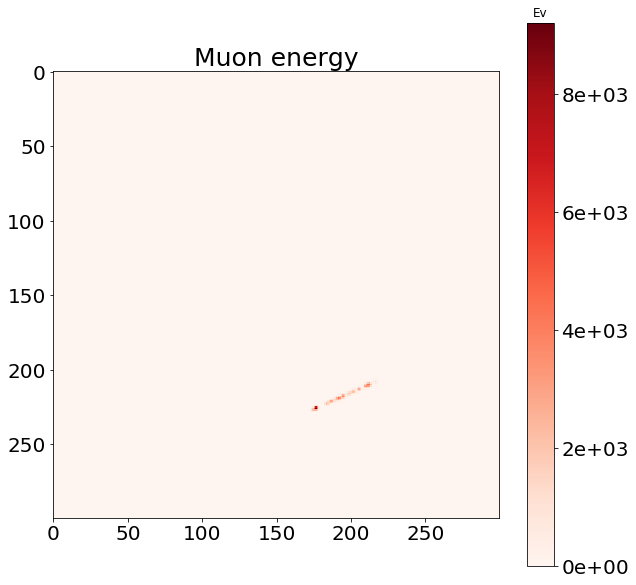

In [7]:
files = glob.glob1(path,"*13.npz")
f=3453
mu = np.load(os.path.join(original_dataset_dir, files[f]))['energy']
n = np.load(os.path.join(original_dataset_dir, files[f]))['noise']

fig_mu = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy", fontsize = 25)

In [8]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'
fig_mu.savefig(myPath + '/energy_mu.png')

Text(0.5, 1.0, 'Noise in the muon signal')

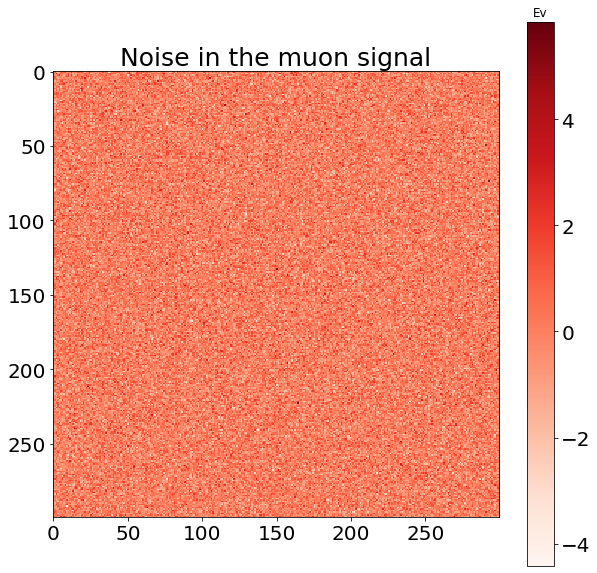

In [9]:
fig_mun = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Noise in the muon signal", fontsize = 25)

In [10]:
fig_mun.savefig(myPath + '/noise_mu.png')

And now we plot the cropped track of the muon:

Text(0.5, 1.0, 'Muon track')

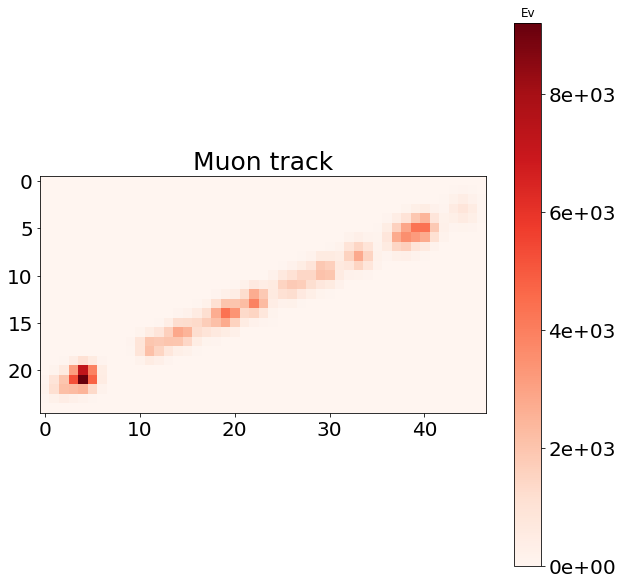

In [11]:
base_dir = '/gpfs/projects/damic/cropped_muons3'
files_cropped = os.listdir(base_dir)
mu = np.load(os.path.join(base_dir, files_cropped[f]))['energy']
n = np.load(os.path.join(base_dir, files_cropped[f]))['noise']

fig_mu_c = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon track", fontsize = 25)

### Cropping electron's track

In [7]:
# The directory where we will store our dataset with the cropped images
base_dir = '/gpfs/projects/damic/cropped_electrons3'
os.mkdir(base_dir)

In [ ]:
#destination directory 
dest = base_dir

#initializing size of the maximum window
#window_x: horizontal dimension, window_y: vertical dimension
#window_xe, window_ye = 0, 0

#selecting electrons
files = glob.glob1(path,"*11.npz")

for index, file in enumerate(files):
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy']
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_b = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #definig the shape of the maximum window
    #we need to add 1 because python starts with row and column 0
    #if (x_max-x_min+1) > window_xe:
     #   window_xe = x_max-x_min+1
    #if (y_max-y_min+1) > window_ye:
     #   window_ye = y_max-y_min+1
    
    print(index)
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)

In [14]:
print("The maximum window for electrons is",window_xe, window_ye)

The maximum window for electrons is 192 242


Text(0.5, 1.0, 'Electron energy')

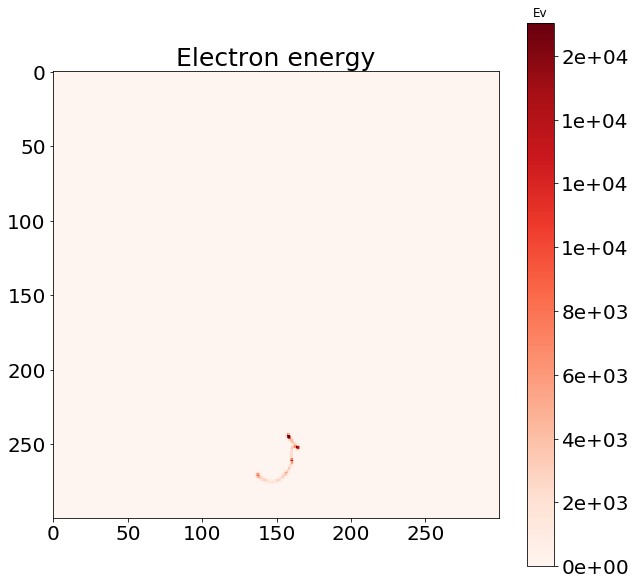

In [4]:
files = glob.glob1(path,"*11.npz")
f=4
e = np.load(os.path.join(original_dataset_dir, files[f]))['energy']
n = np.load(os.path.join(original_dataset_dir, files[f]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

In [11]:
fig_e.savefig(myPath + '/energy_e.png')

Text(0.5, 1.0, 'Noise in the electron signal')

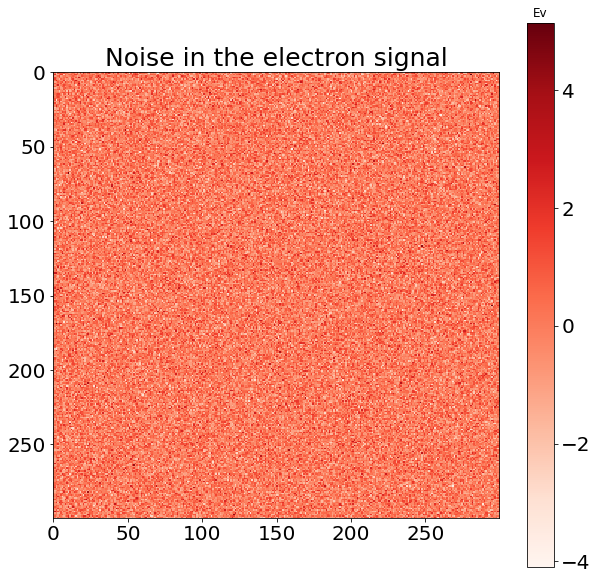

In [5]:
fig_en = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Noise in the electron signal", fontsize = 25)

In [8]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_a/cropped_tracks'

In [8]:
fig_en.savefig(myPath + '/noise_e.png')

And now we plot the cropped electron track:

Text(0.5, 1.0, 'Electron track')

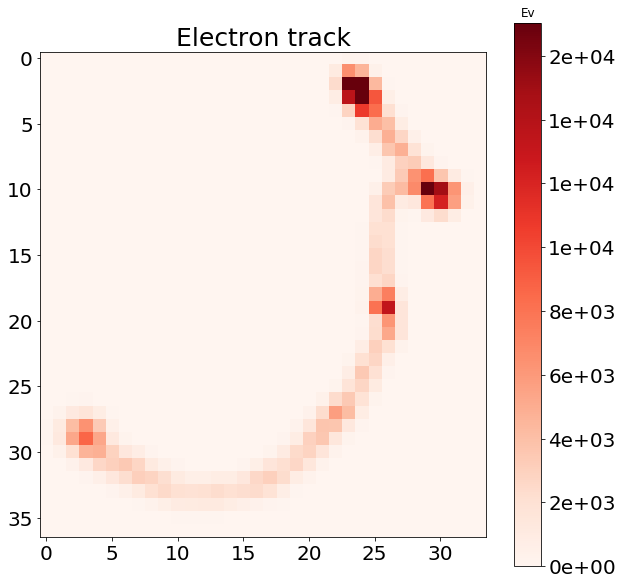

In [10]:
base_dir = '/gpfs/projects/damic/cropped_electrons3'
files_cropped = os.listdir(base_dir)
e = np.load(os.path.join(base_dir, files_cropped[f]))['energy']

fig_e_c = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron track", fontsize = 25)

In [11]:
fig_en.savefig(myPath + '/energy_e_c.png')

### Cropping alpha's track

In [5]:
# The directory where we will store our dataset with the cropped images
base_dir = '/gpfs/projects/damic/cropped_alphas3'
#os.mkdir(base_dir)

In [ ]:
#destination directory 
dest = base_dir

#initializing size of the maximum window
#window_x: horizontal dimension, window_y: vertical dimension
window_xa, window_ya = 0, 0

#selecting electrons
files = glob.glob1(path,"*1000020040.npz")

for index, file in enumerate(files):
    
    #loading each image as a numpy array
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy']
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping energy images 
    coords = np.argwhere(energy_a) #coordinates of non zero elements in the array
    y_min, x_min = coords.min(axis=0) #coordinates of the element located more on the left and more on the top
    y_max, x_max = coords.max(axis=0) #coordinates of the element located more on the right and more on the bottom
    energy_b = energy_a[y_min:y_max+1, x_min:x_max+1]
    
    #definig the shape of the maximum window
    #we need to add 1 because python starts with row and column 0
    if (x_max-x_min+1) > window_xa:
        window_xa = x_max-x_min+1
    if (y_max-y_min+1) > window_ya:
        window_ya = y_max-y_min+1
    
    print(index)
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)

In [14]:
print("The maximum window for alphas is",window_xa, window_ya)

The maximum window for alphas is 15 15


In [3]:
base_dir = '/gpfs/projects/damic/cropped_alphas3'

Text(0.5, 1.0, 'Alpha energy')

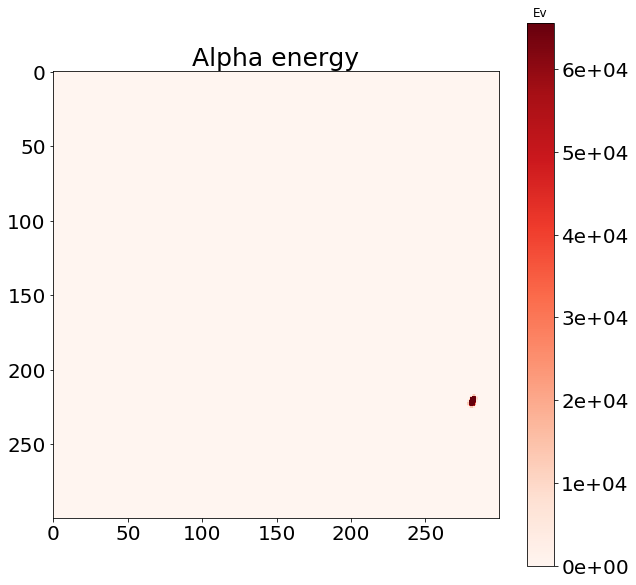

In [6]:
files = glob.glob1(path,"*1000020040.npz")
f=3453
a = np.load(os.path.join(path, files[f]))['energy']
n = np.load(os.path.join(path, files[f]))['noise']

fig_a = plt.figure(figsize=(10,10))
plt.imshow(a, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Alpha energy", fontsize = 25)

In [9]:
fig_a.savefig(myPath + '/energy_a.png')

Text(0.5, 1.0, 'Noise in the alpha signal')

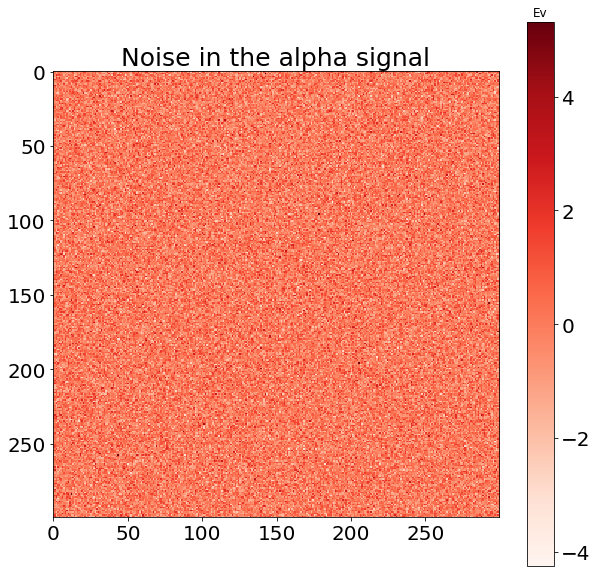

In [10]:
fig_an = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Noise in the alpha signal", fontsize = 25)

In [11]:
fig_an.savefig(myPath + '/noise_a.png')

And now we plot the cropped alpha track:

Text(0.5, 1.0, 'Alpha track')

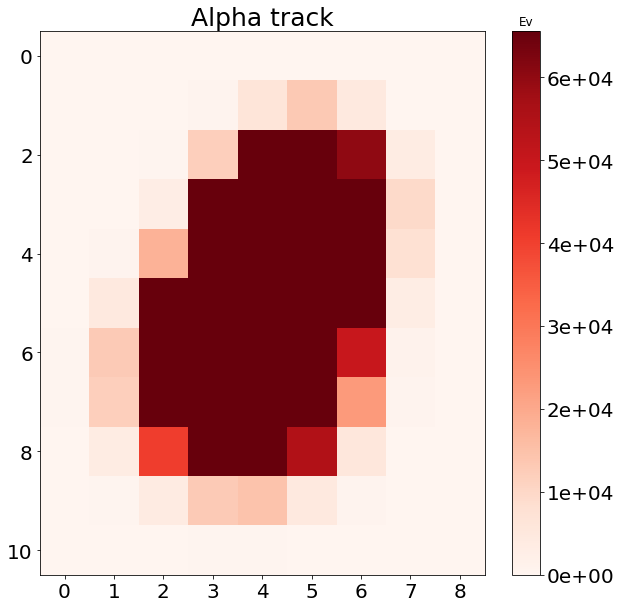

In [4]:
base_dir = '/gpfs/projects/damic/cropped_alphas3'
files_cropped = os.listdir(base_dir)
a = np.load(os.path.join(base_dir, files_cropped[f]))['energy']

fig_a_c = plt.figure(figsize=(10,10))
plt.imshow(a, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Alpha track", fontsize = 25)

In [5]:
fig_a_c.savefig(myPath + '/energy_a_c.png')